In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')


In [2]:
binance_df = pd.read_csv('Binance Coin - Historic Data.csv')

In [3]:
binance_df.head()

,Date,Price(in dollars),Open,High,Low,Vol.,Change%
0,"Jul 27, 2021",303.29,304.31,307.62,298.53,2.26M,-0.33
1,"Jul 26, 2021",304.31,302.60,327.62,301.19,2.86M,0.58
2,"Jul 25, 2021",302.57,302.55,303.09,292.85,1.25M,-0.19
3,"Jul 24, 2021",303.15,298.91,305.01,296.16,1.81M,1.42
4,"Jul 23, 2021",298.89,293.51,301.15,281.68,1.98M,1.83


In [4]:
binance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1357 non-null   object 
 1   Price(in dollars)  1357 non-null   float64
 2   Open               1357 non-null   float64
 3   High               1357 non-null   float64
 4   Low                1357 non-null   float64
 5   Vol.               1357 non-null   object 
 6   Change%            1357 non-null   float64
dtypes: float64(5), object(2)
memory usage: 74.3+ KB


In [5]:
binance_df.describe()

,Price(in dollars),Open,High,Low,Change%
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,60.086728,59.867833,62.954245,56.603434,0.593206
std,121.888722,121.715871,128.359292,114.574371,6.841432
min,1.490000,1.490000,1.580000,1.340000,-44.080000
25%,12.090000,12.080000,12.440000,11.320000,-2.410000
50%,17.110000,17.080000,17.540000,16.440000,0.160000
75%,28.800000,28.770000,29.450000,27.830000,3.050000
max,676.560000,676.250000,690.870000,631.440000,69.990000


In [6]:
binance_df.isnull().sum()

Date                 0
Price(in dollars)    0
Open                 0
High                 0
Low                  0
Vol.                 0
Change%              0
dtype: int64

In [7]:
from datetime import datetime
def date_function(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')
binance_df['Date'] = binance_df['Date'].apply(date_function)
binance_df['Date']

0       2021-07-27
1       2021-07-26
2       2021-07-25
3       2021-07-24
4       2021-07-23
           ...    
1352    2017-11-13
1353    2017-11-12
1354    2017-11-11
1355    2017-11-10
1356    2017-11-09
Name: Date, Length: 1357, dtype: object

In [8]:
binance_df['Date'] = pd.to_datetime(binance_df['Date'], format = '%Y-%m-%d')

In [9]:
binance_df['Vol.']

0         2.26M
1         2.86M
2         1.25M
3         1.81M
4         1.98M
         ...   
1352    166.01K
1353    456.48K
1354    256.71K
1355    483.23K
1356    283.35K
Name: Vol., Length: 1357, dtype: object

In [10]:
def volume_int(x):
    if 'M' in x:
        y = float(x[:-1])*1000000
    elif 'K' in x:
        y = float(x[:-1])*1000
    else:
        y = 0
    return y

In [11]:
binance_df['Volume'] = binance_df['Vol.'].apply(volume_int)

In [12]:
binance_df[['Volume', 'Vol.']]

,Volume,Vol.
0,2260000.0,2.26M
1,2860000.0,2.86M
2,1250000.0,1.25M
3,1810000.0,1.81M
4,1980000.0,1.98M
...,...,...
1352,166010.0,166.01K
1353,456480.0,456.48K
1354,256710.0,256.71K
1355,483230.0,483.23K


In [13]:
binance_df['Volume'].max()

24310000.0

In [14]:
binance_df['Volume'].min()

0.0

In [15]:
binance_df[binance_df['Volume']==0.0][['Volume', 'Vol.']]

,Volume,Vol.
1264,0.0,-


In [16]:
binance_df.iloc[1264]

Date                 2018-02-09 00:00:00
Price(in dollars)                   8.28
Open                                8.28
High                                8.28
Low                                 8.28
Vol.                                   -
Change%                              0.0
Volume                               0.0
Name: 1264, dtype: object

In [17]:
binance_df.columns

Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%',
       'Volume'],
      dtype='object')

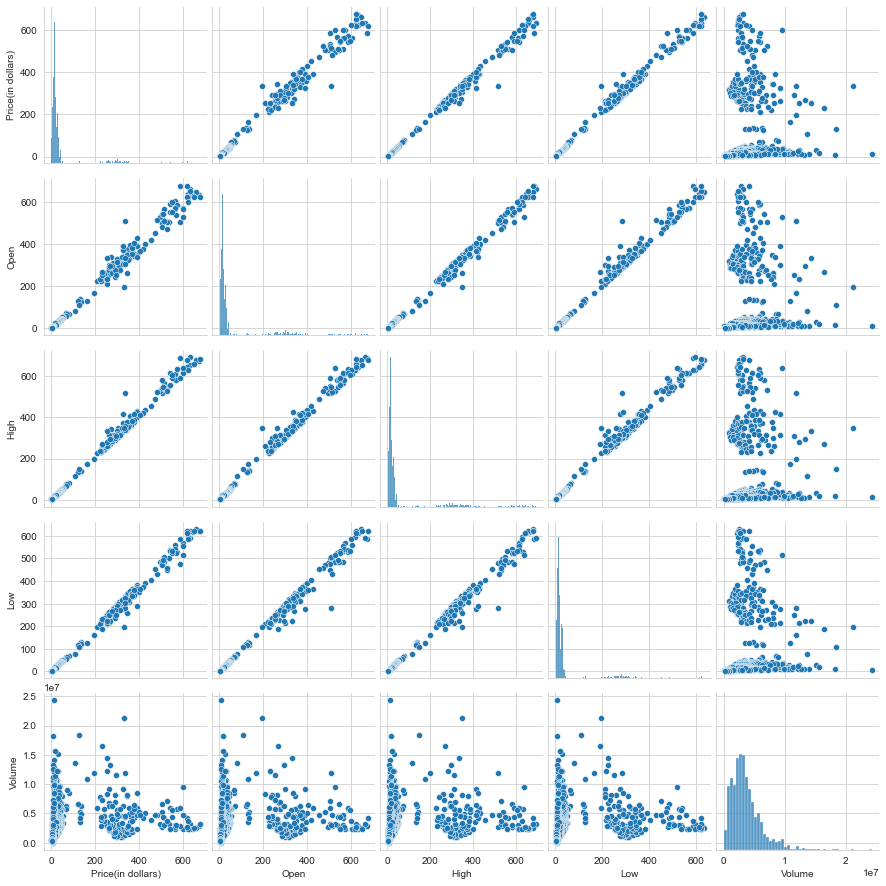

In [18]:
sns.pairplot(data = binance_df[['Date', 'Price(in dollars)', 'Open', 'High', 'Low','Volume']])

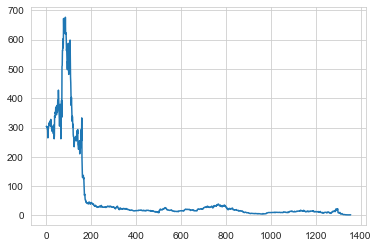

In [40]:
binace_df['Price (in dollars)'].plot(kind = 'line')

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X = binance_df[['Open', 'High', 'Low','Volume']]
y = binance_df['Price(in dollars)']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [24]:
X_train = scaler.fit_transform(X_train)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
X_test = scaler.transform(X_test)

In [32]:
pred = model.predict(X_test)

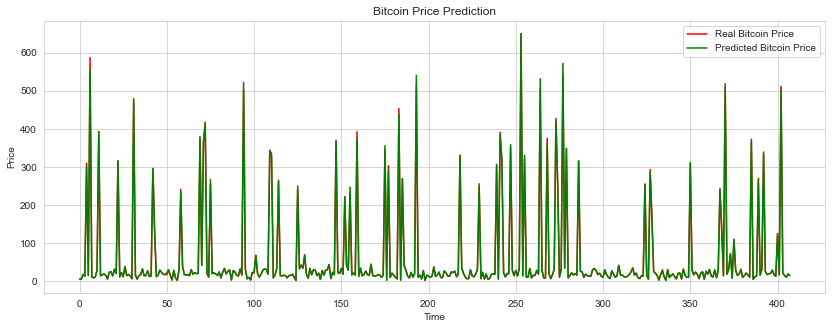

In [33]:
plt.figure(figsize=(14,5))
plt.plot(np.array(y_test), color = 'red', label = 'Real Bitcoin Price')
plt.plot(pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test, pred)

0.9988527217084978

In [36]:
y_test.shape

(408,)

In [37]:
pred.shape

(408,)

In [38]:
np.array(y_test)

array([  4.63,   4.62,  17.28,  12.16, 309.45,  14.07, 587.5 ,  10.98,
         8.26,   9.89,  28.56, 393.2 ,  13.49,  15.32,  18.76,  14.74,
         5.05,  22.75,  24.03,  13.22,  30.85,  19.59, 316.07,  10.19,
        22.07,  11.17,  37.72,  13.72,  16.59,  13.21,   5.79, 472.25,
        14.96,   5.15,  13.7 ,  15.63,  31.19,  13.73,  13.78,  27.02,
        11.77,  13.35, 296.14, 133.07,  11.45,  15.06,  28.52,  22.63,
        17.42,  16.8 ,  16.25,  29.16,  14.9 ,   2.51,  27.7 ,   8.33,
         1.66,  30.02, 240.59,  38.65,  17.14,  15.2 ,  17.04,  13.59,
        29.65,  17.11,  21.67,  18.44,  20.46, 375.47,  41.1 , 367.41,
       417.71,  18.93,  10.42, 255.03,  19.1 ,  20.95,  18.24,  14.43,
        23.5 ,   8.28,  22.5 ,  32.97,  18.42,  24.7 ,  28.96,   2.79,
        27.03,  23.42,  15.54,  13.1 ,  31.31,  15.21, 503.97,  31.05,
         5.7 ,   9.44,   2.26,  22.33,  21.27,  67.75,  18.76,  10.04,
        17.63,  27.76,  31.43,  30.23,  17.47, 343.77, 327.68,   8.03,
      

In [39]:
pred

array([  4.53189651,   4.48800547,  17.51597671,  12.8434475 ,
       298.93372578,  14.57001674, 554.3478623 ,  10.60792219,
         8.31673093,  10.1541776 ,  28.6551954 , 392.02725392,
        13.80318927,  15.67361472,  18.73580961,  14.86361029,
         4.92008453,  22.85035296,  24.31553612,  13.11945002,
        30.81557435,  19.69617844, 315.65198334,  10.71174678,
        22.22053454,  10.75626597,  38.48318896,  14.61210214,
        16.95814621,  13.52272888,   5.74934601, 479.86692058,
        15.17338345,   4.82121008,  14.02684969,  16.0693362 ,
        32.02254364,  14.06476867,  14.21376598,  26.72727897,
        11.39112696,  13.51125699, 295.16166854, 129.71772644,
        11.47150638,  14.79067598,  28.36046647,  22.50866562,
        17.23120099,  16.61828932,  21.42766498,  29.13305741,
        14.79399132,   2.32834592,  28.11718725,   7.37681421,
         1.55276608,  30.74306854, 234.13550799,  38.41215589,
        17.57246744,  15.2539626 ,  17.09584278,  13.84